<div align="center"><FONT FACE="times new roman" SIZE=5>
<img src="https://raw.githubusercontent.com/CamiloHedzz/ProcesamientoImagenes/main/LogoUSA.png"></img>
<div align="center"><FONT FACE="times new roman" SIZE=5>
    <i><b>Docente:</b></i> Oscar Elias Herrera Bedoya<br>
    <i><b>Asignatura:</b></i> Introducción a la Ciencia de Datos<br>
    <i><b>Tema:</b></i> Proyecto Ciencia de Datos<br>
    <i><b>Estudiante: </b></i> Juan Camilo Hernández Ibañez<br>
</div>


# **Introducción**

<p align = 'justify'>
A continuación se explorara los metodos y herramientas analiticas utilzadas para procesar grandes conjuntos de datos. Asi mismo, se pretende abarcar (en la mayor parte posible) el contenido del curso, poniendo en evidencia el uso y funcionamiento de tecnicas de analisis de datos, procesamiento y modelos matematicos.

Los data set utilizados para este laboratorio, fuerón escogidos de la pagina <a href = 'https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification'> Kaggle</a>.
<br>
<br>


<b><FONT SIZE=4>NASA: Clasificación de asteroides </b>
<br>
<p align = 'justify'>
NeoWs (Near Earth Object Web Service) es un servicio web RESTful para información sobre asteroides cercanos a la Tierra. Con NeoWs, un usuario puede: buscar asteroides en función de su fecha de acercamiento más cercano a la Tierra, buscar un asteroide específico con su identificación de cuerpo pequeño JPL de la NASA, así como explorar el conjunto de datos general.
</p>

<b><FONT SIZE=4>Objetivos</b>
<p align = 'justify'>
Encontrar asteroides potencialmente peligrosos y no peligrosos
<br>
Características responsables de afirmar que un asteroide es peligroso
</p>

In [ ]:
# Se importan las librerias necesarias

#Librerias para procesos matematicos
import numpy as np
import pandas as pd

#Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.tree import plot_tree
from pandas.plotting import scatter_matrix

#Construcción del modelo
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [ ]:
!pip install lazypredict

# **Desarrollo**
---

<b><FONT SIZE=5>Analisis exploratorio</b>
<br>
<p align = 'justify'>
Inicialmente se realiza un analisis exploratorio con el fin de conocer mas sobre el conjunto de datos con el que se va a trabajar. De esta manera, lo que se busca es encontrar relaciones entre las variables, encontrar las mas importantes como las que no lo son. Ademas, es importante saber que tipo de datos estan en el dataset, para saber si hay necesidad hacer una estandarización como tambien si existen datos nulos o atipicos que afecten el rendimiento de nuestro modelo. A través de las herramientas de sklearn se realiza el siguiente analisis.
</p>

In [ ]:
#Se carga el dataset desde el repositorio de github
url = 'https://raw.githubusercontent.com/CamiloHedzz/Clasificacion-de-Asteroides/main/nasa.csv'
df = pd.read_csv(url)
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.60,0.13,0.28,127.22,284.47,0.08,0.18,417.39,...,314.37,609.60,0.81,57.26,2.01,2458161.64,264.84,0.59,J2000,True
1,3723955,3723955,21.30,0.15,0.33,146.07,326.62,0.09,0.20,479.23,...,136.72,425.87,0.72,313.09,1.50,2457794.97,173.74,0.85,J2000,False
2,2446862,2446862,20.30,0.23,0.52,231.50,517.65,0.14,0.32,759.52,...,259.48,643.58,0.95,248.42,1.97,2458120.47,292.89,0.56,J2000,True
3,3092506,3092506,27.40,0.01,0.02,8.80,19.68,0.01,0.01,28.88,...,57.17,514.08,0.98,18.71,1.53,2457902.34,68.74,0.70,J2000,False
4,3514799,3514799,21.60,0.13,0.28,127.22,284.47,0.08,0.18,417.39,...,84.63,495.60,0.97,158.26,1.48,2457814.46,135.14,0.73,J2000,True


In [ ]:
'''
Muestra un resumen conciso de la información sobre un DataFrame.
Proporciona detalles útiles sobre el DataFrame, como el número de filas y columnas,
la cantidad de valores no nulos en cada columna, el tipo de datos de cada columna y
la cantidad de memoria utilizada.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

<b><FONT SIZE=5>Matriz de correlación</b>
<br>
<p align = 'justify'>
La matriz de correlación muestra los coeficientes de correlación entre pares de variables. Un coeficiente de correlación es un número que indica la fuerza y la dirección de la relación lineal entre dos variables. Los valores posibles van desde -1 hasta 1:
</p>
<ul>
<li><p align = 'justify'>Un coeficiente de correlación de 1 indica una correlación positiva perfecta, lo que significa que a medida que una variable aumenta, la otra también aumenta en una proporción constante.</p></li>

<li><p align = 'justify'>Un coeficiente de correlación de -1 indica una correlación negativa perfecta, lo que significa que a medida que una variable aumenta, la otra disminuye en una proporción constante.</p></li>

<li><p align = 'justify'>Un coeficiente de correlación cercano a 0 indica una correlación débil o nula entre las variables.</p></li>
</ul>

In [ ]:
corr_matrix = df.corr()

fig = px.imshow(corr_matrix.values,
                x=corr_matrix.index,
                y=corr_matrix.columns)

fig.update_layout(title=dict(x=0.5, text='Matriz de Correlación'),
                  xaxis_title='Variables',
                  yaxis_title='Variables',
                  width=800,
                  height=800,
                  margin=dict(r=0, t=50, b=0,l=0))
fig.show()

**Realizar selección de características de acuerdo con su importancia**

In [ ]:
df.corr()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Neo Reference ID,1.00,1.00,0.60,-0.50,-0.50,-0.50,-0.50,-0.50,-0.50,-0.50,...,-0.18,-0.03,0.04,0.13,-0.01,0.01,0.00,-0.05,-0.02,-0.27
Name,1.00,1.00,0.60,-0.50,-0.50,-0.50,-0.50,-0.50,-0.50,-0.50,...,-0.18,-0.03,0.04,0.13,-0.01,0.01,0.00,-0.05,-0.02,-0.27
Absolute Magnitude,0.60,0.60,1.00,-0.61,-0.61,-0.61,-0.61,-0.61,-0.61,-0.61,...,-0.46,-0.01,-0.21,0.09,0.03,-0.26,-0.12,-0.05,0.20,-0.33
Est Dia in KM(min),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in KM(max),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in M(min),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in M(max),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in Miles(min),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in Miles(max),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in Feet(min),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13


<b><FONT SIZE=5>Análisis</b>
<br>
<p align = 'justify'>
Como se explico anteriormente, las variables de mayor importancia son aquellas que presenten un valor de correlacion de 1 y -1. Con la matriz anterior se puede observar que las columnas que se refieren al diametro "Estimated Diameter in Meters" en inglés, estan fuertemente relacionadas con otras variables del dataset como lo es la <b>incertidumbre orbital</b>. Esta variable es de gran importancia ya que se refiere a la falta de precisión o conocimiento completo sobre los parámetros orbitales de un objeto en el espacio, como un asteroide, un cometa o una sonda espacial. Estos parámetros orbitales incluyen elementos como el semieje mayor, la excentricidad, la inclinación y la posición en el plano orbital, entre otros.
</p>


<p align = 'justify'>
Tambien la <b>inclinación y el movimiento medio (mean motion)</b>, son variables tambien a tener en cuenta ya que esta ultima se refiere a la velocidad promedio a la que el asteroide recorre su órbita alrededor del Sol. Es una medida de cuántas revoluciones completa el asteroide en un período determinado, generalmente expresado en grados por día.
</p>

<p align = 'justify'>
<b>El invariante de Tisserand de Júpiter</b> (Jupiter Tisserand Invariant) es un parámetro utilizado en la mecánica celeste y la astronomía para describir órbitas de cuerpos en el sistema solar en relación con Júpiter. Es una medida de la relación entre la energía orbital de un cuerpo y su distancia al planeta Júpiter. Claramente, si el asteroide esta influenciado por la gravedad de jupiter es un indicativo de que no representa un peligro para la tierra, es por esto que este parametro es de suma importancia.
</p>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [ ]:
#Se escojen las columnas de interes
X = df.iloc[:,[2,3,4,25,24,23,29,37]]
y = df.iloc[:,[39]]

<b><FONT SIZE=5>Rango Intercuantilico</b>
<br>
<p align = 'justify'>
<a href= https://www.estadisticaparatodos.es/taller/graficas/cajas.html>Este rectángulo está dividido por un segmento vertical</a> que indica donde se posiciona la mediana y por lo tanto su relación con los cuartiles primero y tercero(recordemos que el segundo cuartil coincide con la mediana).
Esta caja se ubica a escala sobre un segmento que tiene como extremos los valores mínimo y máximo de la variable. Las lineas que sobresalen de la caja se llaman bigotes. Estos bigotes tienen tienen un límite de prolongación, de modo que cualquier dato o caso que no se encuentre dentro de este rango es marcado e identificado individualmente.</p>
<div align="center">
<img src= "https://raw.githubusercontent.com/CamiloHedzz/imagesColab/main/bigote1.png" width=500></img>


El bigote de la izquierda representa al colectivo de edades ( Xmín, Q1)
La primera parte de la caja a (Q1, Q2),
La segunda parte de la caja a (Q2, Q3)
El bigote de la derecha viene dado por (Q3, Xmáx).

In [ ]:
fig = px.box(X, y=X.iloc[:].columns)

fig.update_layout(title=dict(x=0.5, text='Valores Atipicos'),
                  width=800,
                  height=800,
                  margin=dict(r=0, t=50, b=0,l=0))
fig.show()


In [ ]:
aux = df.iloc[:,[2,3,4,25,24,23,29,37]]

# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
Q1 = aux.quantile(q=.10)
Q3 = aux.quantile(q=.90)
IQR = aux.apply(stats.iqr)

X = aux[~((aux < (Q1-1.5*IQR)) | (aux > (Q3+1.5*IQR))).any(axis=1)]

y = df.loc[X.index, 'Hazardous']

In [ ]:
print("El conjunto de datos original tiene: ", aux.shape[0])
print("La cantidad de datos resultantes sin datos atipicos son: ", X.shape[0])
print("Cantidad de datos eliminados: ", aux.shape[0] - X.shape[0])

El conjunto de datos original tiene:  4687
La cantidad de datos resultantes sin datos atipicos son:  4430
Cantidad de datos eliminados:  257


In [ ]:
fig = px.box(X, y=X.iloc[:].columns)

fig.update_layout(title=dict(x=0.5, text='Valores Atipicos'),
                  width=800,
                  height=800,
                  margin=dict(r=0, t=50, b=0,l=0))
fig.show()

In [ ]:
#Se separan los daton en conjunto de test y train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=False)
X_train.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Jupiter Tisserand Invariant,Minimum Orbit Intersection,Orbit Uncertainity,Inclination,Mean Motion
0,21.60,0.13,0.28,4.63,0.03,5,6.03,0.59
1,21.30,0.15,0.33,5.46,0.19,3,28.41,0.85
2,20.30,0.23,0.52,4.56,0.04,0,4.24,0.56
3,27.40,0.01,0.02,5.09,0.01,6,7.91,0.70
4,21.60,0.13,0.28,5.15,0.03,1,16.79,0.73


In [ ]:
X_train.shape

(3101, 8)

<b><FONT SIZE=5>¿Qué modelo escojer?</b>
<br>
<p align = 'justify'>
Con lazypredict.Supervised nos podemos llevar una leve idea de que modelo utilizar, esta libreria muestra las metricas de rendimiento para cada modelo para dar una idea del rendimiento. En este caso RandomForestClassifier y DecisionTreeClassifier entan dentro del conjunto de modelos que presentan el mayor rendimiento. En este caso, ambos modelos sirven para clasificar y el problema que se quiere solucionar es determinar si un asteroide es peligroso o no.

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:12<00:00,  2.31it/s]


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               0.99     0.99      1.00   
PassiveAggressiveClassifier        0.97               0.98     0.98      0.97   
QuadraticDiscriminantAnalysis      0.99               0.98     0.98      0.99   
Perceptron                         0.96               0.97     0.97      0.97   
ExtraTreesClassifier               0.99               0.97     0.97      0.99   
SVC                         

#__Pipeline de Preprocesamiento__
___
<p align = 'justify''>
Un Pipeline de Preprocesamiento de datos es una construcción lógica que representa un proceso dividido en fases. Los pipelines se caracterizan por definir el conjunto de pasos o fases y las tecnologías involucradas en un proceso de movimiento o procesamiento de datos. Estos son necesarias ya que no debemos analizar los datos en los mismos sistemas donde se crean. El proceso de analítica es costoso computacionalmente, por lo que se separa para evitar perjudicar el rendimiento del servicio.
</p>

In [ ]:
pipeline_numeric = Pipeline([('imputar', SimpleImputer(strategy='median')),
                             ('escalado', MinMaxScaler())])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3301
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           3101 non-null   float64
 1   Est Dia in KM(min)           3101 non-null   float64
 2   Est Dia in KM(max)           3101 non-null   float64
 3   Jupiter Tisserand Invariant  3101 non-null   float64
 4   Minimum Orbit Intersection   3101 non-null   float64
 5   Orbit Uncertainity           3101 non-null   int64  
 6   Inclination                  3101 non-null   float64
 7   Mean Motion                  3101 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 218.0 KB


##__Column Transformer__
<p align = 'justify'">
Esto permite que el aprendizaje de las transformaciones se haga únicamente con observaciones de entrenamiento, y se puedan aplicar después a cualquier conjunto de datos.


Como todo transformer, tiene un método de entrenamiento (fit) y otro de transformación (transform).
</p>


In [ ]:
column_transformer = ColumnTransformer([("Eliminar", "drop", [0,7]),
                                       ("Pipeline_numerico", pipeline_numeric, [0,1,2,3,4,5,6,7])])

In [ ]:
column_transformer

ColumnTransformer(transformers=[('Eliminar', 'drop', [0, 7]),
                                ('Pipeline_numerico',
                                 Pipeline(steps=[('imputar',
                                                  SimpleImputer(strategy='median')),
                                                 ('escalado', MinMaxScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7])])

In [ ]:
column_transformer.fit_transform(X_train)

array([[0.27083333, 0.16485776, 0.16485776, ..., 0.55555556, 0.12050236,
        0.27103592],
       [0.25      , 0.1894776 , 0.1894776 , ..., 0.33333333, 0.56925931,
        0.40797558],
       [0.18055556, 0.30107381, 0.30107381, ..., 0.        , 0.08466076,
        0.25427682],
       ...,
       [0.38888889, 0.07463789, 0.07463789, ..., 0.33333333, 0.19332107,
        0.40949706],
       [0.52777778, 0.02891938, 0.02891938, ..., 0.88888889, 0.52649573,
        0.51526809],
       [0.31944444, 0.11906515, 0.11906515, ..., 0.66666667, 0.33143387,
        0.26201723]])

<b><FONT SIZE=5>El RandomForestClassifier</b>
<br>
<p align = 'justify'>
Es un algoritmo de aprendizaje automático que utiliza una técnica llamada Bosque Aleatorio (Random Forest) para realizar tareas de clasificación. Crea un conjunto (o bosque) de árboles de decisión y combina sus decisiones para obtener una predicción final. Esto puede mejorar la precisión y la robustez del modelo en comparación con un solo árbol de decisión.
<br>
Cada árbol en el bosque se entrena con una muestra aleatoria de los datos y produce una predicción. Luego, las predicciones de todos los árboles se combinan para determinar la clasificación final. El Random Forest es conocido por su capacidad para manejar características irrelevantes, manejar bien datos faltantes y reducir el sobreajuste.
</p>

In [ ]:
model = RandomForestClassifier()
results = cross_validate(model, column_transformer.fit_transform(X_train), y_train, cv=10, return_train_score=True)
results

{'fit_time': array([0.48418427, 0.29088473, 0.32040572, 0.29623437, 0.30175376,
        0.29394889, 0.54733562, 0.67156839, 0.32924223, 0.28743148]),
 'score_time': array([0.00870538, 0.00979662, 0.00910497, 0.00994492, 0.0089848 ,
        0.00884652, 0.02047825, 0.01652551, 0.00871873, 0.00862288]),
 'test_score': array([1.        , 0.99677419, 0.99677419, 0.99032258, 0.99677419,
        0.99354839, 0.99677419, 0.99032258, 1.        , 0.99354839]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [ ]:
print("Acc train:", results['train_score'].mean()*100, "+-", results['train_score'].std())
print("Acc val:", results['test_score'].mean()*100, "+-", results['test_score'].std())

Acc train: 100.0 +- 0.0
Acc val: 99.54838709677419 +- 0.003289690008769538


<b><FONT SIZE=5>Ajuste de hiperparametros</b>
<br>
<p align = 'justify'>
<b>N_estimators:</b> Este es el número de árboles de decisión que se van a construir en el bosque. Cada árbol se entrena con una muestra aleatoria de los datos y luego vota para la clasificación final. Un número mayor de estimadores generalmente mejora el rendimiento del modelo, pero también puede aumentar el tiempo de entrenamiento.
<br><br>
<b>Criterion:</b> Este parámetro define la función que se utiliza para medir la calidad de una división en los nodos del árbol. 'entropy' se refiere a la entropía de la información, que mide la impureza en un conjunto de datos. Otra opción común es 'gini', que se basa en el índice de Gini. Ambos criterios son medidas de la impureza del nodo y se utilizan para tomar decisiones sobre cómo dividir el árbol.
<br><br>
<b>Max_depth:</b> La profundidad máxima de cada árbol en el bosque. Controla la cantidad de niveles que puede tener un árbol. Limitar la profundidad puede ayudar a prevenir el sobreajuste (overfitting), pero también puede reducir la capacidad del modelo para capturar patrones complejos en los datos.
<br><br>
<b>Random_state:</b> Este parámetro se utiliza para asegurarte de que obtengas los mismos resultados cada vez que ejecutes el modelo. Al proporcionar un valor fijo (como 0), garantizas que las muestras aleatorias, que se utilizan para entrenar los árboles, sean las mismas en cada ejecución. Esto puede hacer que tus resultados sean reproducibles.
</p>

In [ ]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth= 100,random_state = 0)
model.fit(column_transformer.fit_transform(X_train), y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, random_state=0)

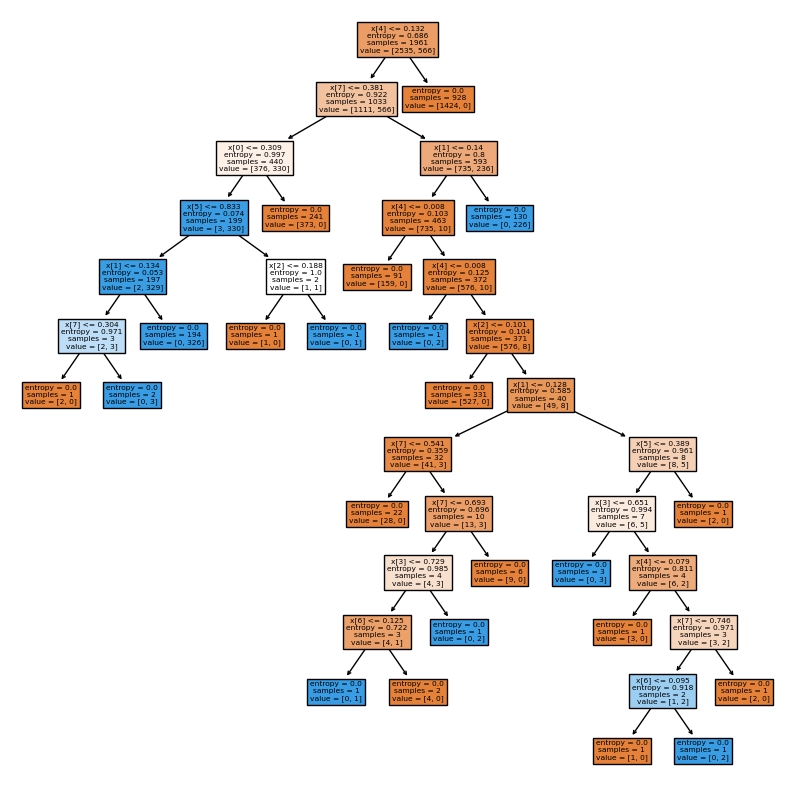

In [ ]:
plt.figure(figsize=(10,10))  # Ajusta el tamaño de la figura según tus preferencias
plot_tree(model.estimators_[0], filled=True)
plt.show()

<b><FONT SIZE=5>Evaluación del modelo</b>

<p align = 'justify'>
<a href="https://www.datasource.ai/es/data-science-articles/comprension-de-la-matriz-de-confusion-y-como-implementarla-en-python">Una matriz de confusión</a>, también conocida como matriz de error, es una tabla resumida que se utiliza para evaluar el rendimiento de un modelo de clasificación. El número de predicciones correctas e incorrectas se resumen con los valores de conteo y se desglosan por cada clase.</p>
<p align = 'justify'>
A continuación se muestra una imagen de la estructura de una matriz de confusión de 2x2. Para dar un ejemplo, digamos que hubo diez casos en los que un modelo de clasificación predijo "Sí" en los que el valor real fue "Sí". Entonces el número diez iría en la esquina superior izquierda en el cuadrante Verdadero Positivo. Esto nos lleva a algunos términos clave:</p>
<div align="center">
<img src="https://miro.medium.com/v2/resize:fit:1129/1*n2im9rDJdRQMBNZ3pPMKXw.png" width=700px></img>
</div>
<p align = 'justify'>
<b>Positivo (P):</b> La observación es positiva (por ejemplo, es un perro).
<br>
Negativo (N):</b> La observación no es positiva (por ejemplo, no es un perro).
<br>
<b>Verdadero Positivo (TP):</b> Resultado en el que el modelo predice correctamente la clase positiva.
<br>
<b>Verdadero Negativo (TN):</b> Resultado donde el modelo predice correctamente la clase negativa.
<br>
<b>Falso Positivo (FP):</b> También llamado error de tipo 1, resultado donde el modelo predice incorrectamente la clase positiva cuando en realidad es negativa.
<br>
<b>Falso Negativo (FN):</b> También llamado error de tipo 2, un resultado en el que el modelo predice incorrectamente la clase negativa cuando en realidad es positiva.</p>

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict( column_transformer.fit_transform(X_test))

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1161,    1],
       [   3,  164]])

In [ ]:
import plotly.figure_factory as ff

x = ['YES', 'NO']
y =  ['NO', 'YES']

z_text = [[str(y) for y in x] for x in cm]

fig = ff.create_annotated_heatmap(cm, x=x, y=x, annotation_text=z_text, colorscale='Viridis')

fig.add_annotation(dict(font=dict(color="black", size=14), x=0.5, y=-0.15, showarrow=False, text="Predicted value", xref="paper", yref="paper"))
fig.add_annotation(dict(font=dict(color="black", size=14), x=-0.1, y=0.5, showarrow=False, text="Real value",textangle=-90, xref="paper", yref="paper"))
fig.update_layout(title=dict(x=0.5, text='<b>Confusion matrix</b>'),
                  width=500,
                  height=500,
                  margin=dict(r=0, t=100, b=100,l=0))

fig['data'][0]['showscale'] = True
fig.show()

In [ ]:
#Se procede a determinar las metricas de rendimiento de nuestro modelo a través de las librerias de sklearn
acc = accuracy_score(y_test, y_pred)

re = recall_score(y_test, y_pred, average=None)

p = precision_score(y_test, y_pred, average=None)

In [ ]:
print("Accuracy: ", acc)
print("Recall: ", re[0])
print("Presicion: ", p[0])

Accuracy:  0.9969902182091799
Recall:  0.9991394148020654
Presicion:  0.9974226804123711


<b><FONT SIZE=5>Análisis</b>

<p align = 'justify'>
Con estos valores obtenidos nos podemos dar cuenta de que nuestro modelo es optimo ya que con la metrica de accuracy la cual es la proporción de predicciones que el modelo clasificó correctamente, se obtuvo un porcentaje del 99.9%
</p>

<p align = 'justify'>
¿Qué proporción de identificaciones positivas fue realmente correcta? se refiere a la Precisión, en este caso tambien se obtuvo un resultado del 99.9%
</p>

<p align = 'justify'>
¿Qué proporción de positivos reales se identificó correctamente?, en el Recall se obtubo un 99.9%
</p>

<b><FONT SIZE=5>Predicciones</b>

In [ ]:
#Se hace una predicción en el conjunto de train
muestra1 = X_train.iloc[[2,3,4,25,24,23,29,37]].iloc[[0]]
muestra1

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Jupiter Tisserand Invariant,Minimum Orbit Intersection,Orbit Uncertainity,Inclination,Mean Motion
2,20.30,0.23,0.52,4.56,0.04,0,4.24,0.56


In [ ]:
model.predict(muestra1)

array([ True])

In [ ]:
#0.64 de probabilidad de ser de la clase positiva
model.predict_proba(muestra1)

array([[0.36, 0.64]])

<b><FONT SIZE=5>Predicción 2</b>

In [ ]:
#Se hace una predicción en el conjunto de test
muestra2 = X_test.iloc[[24,23,2,3,4,5,6,7,8,9,10]].iloc[[1]]
muestra2

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Jupiter Tisserand Invariant,Minimum Orbit Intersection,Orbit Uncertainity,Inclination,Mean Motion
3326,22.20,0.10,0.22,3.76,0.00,6,32.95,0.44


In [ ]:
model.predict(muestra2)

array([False])

In [ ]:
#0.69 de probabilidad de ser de la clase negativa
model.predict_proba(muestra2)

array([[0.69, 0.31]])

In [ ]:
y_test.iloc[1]

False

# **Conclusiones**
---

<ul>
 <li><b>Efectividad en la Identificación de Amenazas Cósmicas:</b> <p align = 'justify'>El modelo RandomForestClassifier ha demostrado una asombrosa capacidad para identificar asteroides potencialmente peligrosos para la Tierra. Con una precisión excepcionalmente alta del 99.74%, es capaz de distinguir entre los asteroides que podrían representar una amenaza y aquellos que son inofensivos. Este logro es esencial en la detección temprana y el monitoreo de objetos celestes que podrían tener un impacto catastrófico en nuestro planeta.</p></li>

<li><b>Minimización de Falsos Negativos: </b> <p align = 'justify'>El valor de recall del 99.91% destaca la habilidad del modelo para minimizar los falsos negativos, es decir, la cantidad de asteroides peligrosos que podrían pasarse por alto. Este resultado es crucial, ya que un falso negativo en este contexto podría tener consecuencias devastadoras. La capacidad del modelo para prácticamente eliminar los falsos negativos subraya su confiabilidad y su capacidad para identificar de manera confiable los objetos espaciales con riesgo potencial.</p></li>

<li><b>Importancia de las Características Clave: </b> <p align = 'justify'>El análisis revela que ciertas características juegan un papel esencial en la clasificación precisa de asteroides. "Absolute Magnitude," "Est Dia in KM," y "Minimum Orbit Intersection" emergen como variables cruciales en la determinación de si un asteroide es peligroso. Esto sugiere que factores como el tamaño estimado, la órbita y las propiedades físicas desempeñan un papel vital en la clasificación. Esta comprensión enriquece nuestra visión sobre las características que deberían ser priorizadas en futuras investigaciones y esfuerzos de monitoreo.</p></li>

# **Como mejorar el modelo**

**Enriquecimiento del Conjunto de Datos:**
<p align = 'justify'>
Considera la posibilidad de agregar más datos al conjunto de entrenamiento para aumentar la diversidad y la representatividad. Esto puede ayudar al modelo a aprender patrones más generales y a generalizar mejor en nuevos datos.
Asegúrate de que los datos adicionales sean de alta calidad y estén bien etiquetados para evitar introducir ruido al modelo.
</p>

**Exploración de Otros Algoritmos:**
<p align = 'justify'>
Además del RandomForestClassifier, experimenta con otros algoritmos de aprendizaje automático, como Gradient Boosting, Support Vector Machines (SVM) o Redes Neuronales, para ver si alguno de ellos se adapta mejor a los datos y ofrece un mejor rendimiento.</p>

**Interpretación del Modelo:**
<p align = 'justify'>
Utiliza técnicas de interpretación del modelo, como la importancia de las características, para comprender mejor qué características están influyendo más en las decisiones del modelo y cómo se están utilizando.</p>
